The SEMMA (Sample, Explore, Modify, Model, and Assess) method is a popular framework for data mining, focusing on extracting valuable insights from datasets. Here’s how you can apply the SEMMA method to the Restaurant Cuisine Classification dataset:

Dataset: https://www.kaggle.com/code/dhruvb99/resturant-rating-predictor

## 1. Sample
Objective: Create a representative sample of the data for analysis.

In [21]:
import pandas as pd

# Load the dataset
restaurant_data = pd.read_csv('/content/Restaurant.csv')

# Check the first few rows of the dataset
print(restaurant_data.head())

# Optionally, create a sample of the dataset if it's too large
# For instance, take a 10% random sample
restaurant_sample = restaurant_data.sample(frac=0.1, random_state=42)
restaurant_sample.head()


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
4731,3918,Wah Ji Wah,1,New Delhi,"B-6/1, Double Story, Near Metro Pillar 371, Ra...",Kirti Nagar,"Kirti Nagar, New Delhi",77.128443,28.651778,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,2.1,Red,Poor,54
1468,18408054,19 Flavours Biryani,1,Gurgaon,"Global Foyer Mall, Sector 43, Golf Course Road...","Global Foyer Mall, Golf Course Road","Global Foyer Mall, Golf Course Road, Gurgaon",77.095432,28.460444,"Mughlai, Hyderabadi",...,Indian Rupees(Rs.),No,Yes,No,No,2,4.1,Green,Very Good,84
9037,309693,Andaaz E Paranthas,1,Noida,"306, 2nd Floor, Food Court, Spice World Mall, ...","Spice World Mall, Sector 25","Spice World Mall, Sector 25, Noida",77.340449,28.585474,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.2,Orange,Average,36
7866,18157386,Tony's,1,New Delhi,"C-23, Single Storey, Vijay Nagar, New Delhi",Vijay Nagar,"Vijay Nagar, New Delhi",77.201128,28.692000,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,4.4,Green,Very Good,163
5570,18396163,Yummy Adda,1,New Delhi,"1333, Near Batra Cinema, Mukherjee Nagar, New ...",Mukherjee Nagar,"Mukherjee Nagar, New Delhi",77.216130,28.712062,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,1,3.5,Yellow,Good,14


## 2. Explore
Objective: Understand the dataset by summarizing statistics and visualizing distributions.

<class 'pandas.core.frame.DataFrame'>
Index: 955 entries, 4731 to 304
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         955 non-null    int64  
 1   Restaurant Name       955 non-null    object 
 2   Country Code          955 non-null    int64  
 3   City                  955 non-null    object 
 4   Address               955 non-null    object 
 5   Locality              955 non-null    object 
 6   Locality Verbose      955 non-null    object 
 7   Longitude             955 non-null    float64
 8   Latitude              955 non-null    float64
 9   Cuisines              954 non-null    object 
 10  Average Cost for two  955 non-null    int64  
 11  Currency              955 non-null    object 
 12  Has Table booking     955 non-null    object 
 13  Has Online delivery   955 non-null    object 
 14  Is delivering now     955 non-null    object 
 15  Switch to order menu  955

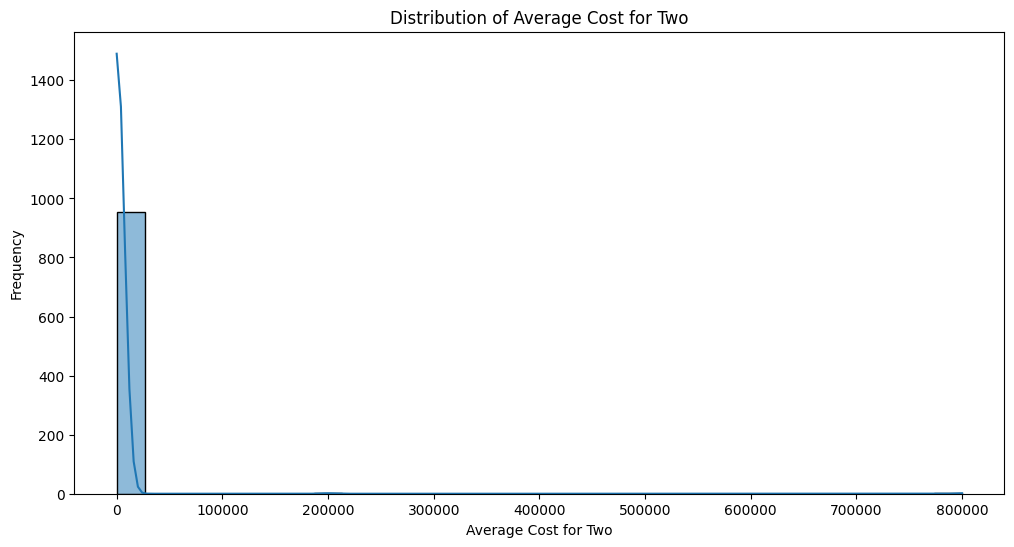

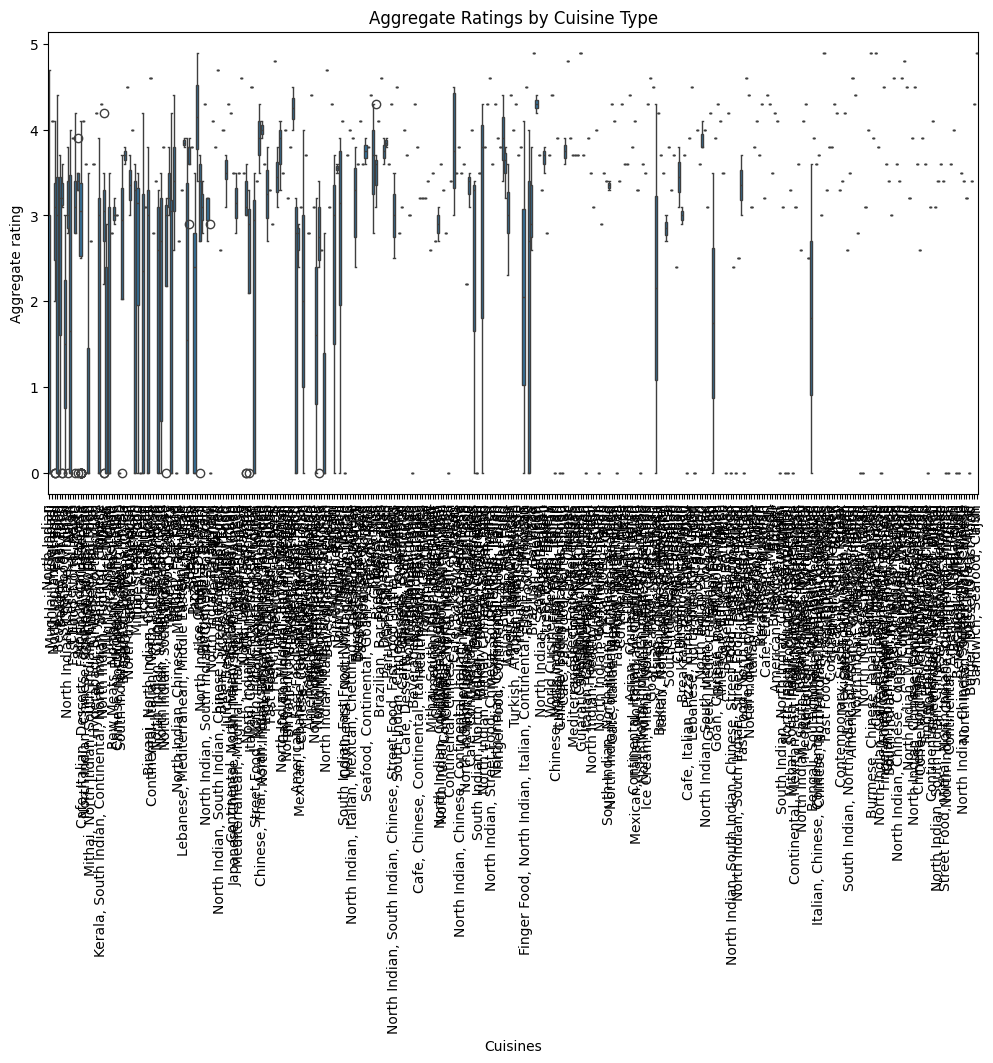

In [22]:
# Get basic information about the dataset
print(restaurant_sample.info())

# Get descriptive statistics
print(restaurant_sample.describe())

# Visualize the distribution of average costs and aggregate ratings
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(restaurant_sample['Average Cost for two'], bins=30, kde=True)
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=restaurant_sample)
plt.title('Aggregate Ratings by Cuisine Type')
plt.xticks(rotation=90)
plt.show()


## 3. Modify
Objective: Clean the data and transform it to make it suitable for modeling.

In [23]:
# Check for missing values
print(restaurant_sample.isnull().sum())

# Fill missing values, if necessary (example: filling with median for numerical columns)
restaurant_sample['Average Cost for two'].fillna(restaurant_sample['Average Cost for two'].median(), inplace=True)

# Convert categorical variables into numeric using one-hot encoding
# One-hot encoding for Cuisines, keeping the original column
cuisines_encoded = pd.get_dummies(restaurant_sample['Cuisines'], drop_first=True)

# Drop the original Cuisines column and other irrelevant columns
restaurant_sample.drop(columns=['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose'], inplace=True)

# Concatenate the one-hot encoded Cuisines with the rest of the DataFrame
restaurant_sample = pd.concat([restaurant_sample, cuisines_encoded], axis=1)

# Verify the resulting DataFrame
print(restaurant_sample.head())


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                1
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
      Country Code       City  Longitude   Latitude               Cuisines  \
4731             1  New Delhi  77.128443  28.651778           North Indian   
1468             1    Gurgaon  77.095432  28.460444    Mughlai, Hyderabadi   
9037             1      Noida  77.340449  28.585474  North Indian, Mughlai   
7866             1  New Delhi  77.201128  28.692000              Fast Food   
5570             1  New Delhi  77.216130  28.712062

## 4. Model Phase
In this phase, we will train a machine learning model using the processed data. We will use a RandomForestClassifier for classification.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

# Check for missing values and fill them if necessary (not shown for brevity)
# Assuming restaurant_sample is already preprocessed and contains no missing values

# Print the data types of the DataFrame to check which are categorical
print(restaurant_sample.dtypes)

# Initialize the Label Encoder
labelencoder = preprocessing.LabelEncoder()

# Encode the target variable 'Cuisines' using Label Encoder
restaurant_sample['Cuisines'] = labelencoder.fit_transform(restaurant_sample['Cuisines'])

# Separate features and target variable
X = restaurant_sample.drop(columns=['Cuisines'])  # Features
y = restaurant_sample['Cuisines']  # Target

# Convert remaining categorical variables to numeric if needed
X = X.apply(labelencoder.fit_transform)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



Country Code                          int64
City                                 object
Longitude                           float64
Latitude                            float64
Cuisines                             object
                                     ...   
Sunda, Indonesian                      bool
Tea, Modern Australian                 bool
Tibetan, Chinese                       bool
Turkish, Arabian, Middle Eastern       bool
World Cuisine, Mexican, Italian        bool
Length: 374, dtype: object
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

## 5. Assess Phase
In this phase, we will evaluate the performance of the trained model using a confusion matrix and classification report.

In [34]:

import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have y_test and y_pred from previous code
# Evaluate the model's performance

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")






Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          23       0.80      1.00      0.89         4
          24       0.00      0.00      0.00         1
          25       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

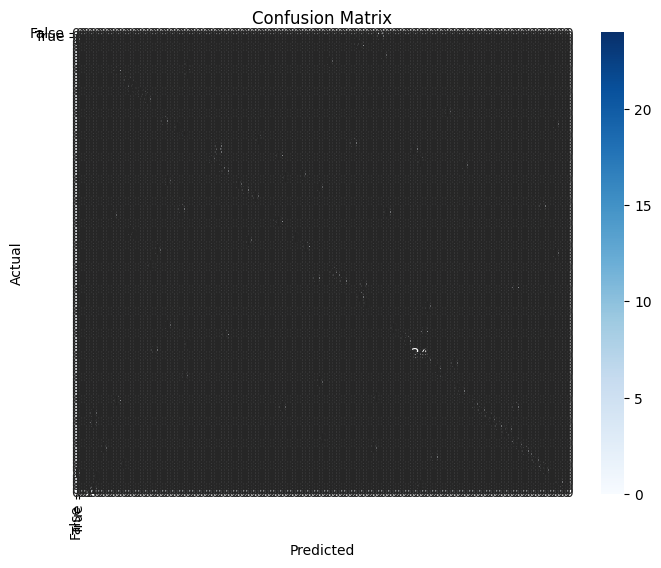

In [35]:
# 4. Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()